In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)
mnist.keys()
X, y = mnist['data'], mnist['target']

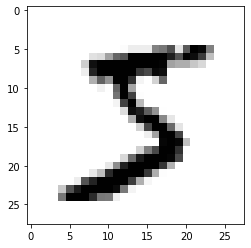

In [4]:
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.imshow(X[0].reshape(28, 28), cmap='binary')

In [11]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=10000/70000)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=10000/60000)

In [15]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

clfs = []
scores = []

for clf in (RandomForestClassifier(), ExtraTreesClassifier(), SVC()):
    clf.fit(X_train, y_train)
    train_pred = clf.predict(X_train)
    val_pred = clf.predict(X_val)
    clfs.append(clf)
    scores.append((accuracy_score(y_train, train_pred), accuracy_score(y_val, val_pred)))
    print(f"{clf.__class__.__name__}: {scores[-1]}")

RandomForestClassifier: (1.0, 0.9685)
ExtraTreesClassifier: (1.0, 0.9721)


KeyboardInterrupt: 

In [18]:
from sklearn.ensemble import VotingClassifier

voting_clf = VotingClassifier(
    estimators=[('rf', RandomForestClassifier()), ('xrf', ExtraTreesClassifier())], #('svc', SVC())],
    voting='hard'
)

voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=True,
                                                     ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features='auto',
                                                     max_leaf_nodes=None,
                                                     max_samples=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
        

In [19]:
vclf_pred_train = voting_clf.predict(X_train)
vclf_pred_val = voting_clf.predict(X_val)
vclf_pred_test = voting_clf.predict(X_test)

print(f"TRAIN: {accuracy_score(y_train, vclf_pred_train)}")
print(f"VAL: {accuracy_score(y_val, vclf_pred_val)}")
print(f"TEST: {accuracy_score(y_test, vclf_pred_test)}")

TRAIN: 1.0
VAL: 0.9694
TEST: 0.9709


In [21]:
preds = []

for clf in clfs:
    preds.append(clf.predict(X_val))
    

In [86]:
import numpy as np

X_pred = [ [int(preds[0][i]), int(preds[1][i])] for i, p in enumerate(preds[0])]
y_val = y_val.astype(np.int)

In [91]:
from sklearn.linear_model import LogisticRegression

log_clf = LogisticRegression()
log_clf.fit(np.array(X_pred), y_val.reshape(-1, 1))
log_clf.score(np.array(X_pred), y_val.reshape(-1, 1))

Z:\anaconda\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
Z:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


0.968

In [92]:
test_preds = []

for clf in clfs:
    preds.append(clf.predict(X_test))
    
X_test_pred = [ [int(test_preds[0][i]), int(test_preds[1][i])] for i, p in enumerate(test_preds[0])]
y_test = y_test.astype(np.int).reshape(-1, 1)

IndexError: list index out of range

In [93]:
test_preds

[]